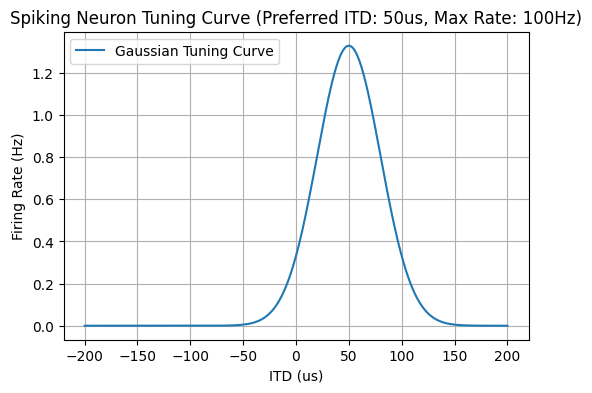

In [1]:
# plot a Gaussian tuning curve for one neuron

import numpy as np
import matplotlib.pyplot as plt

#parameters
preferred_itd = 50  # us
sigma = 30          # us (width of the tuning curve)
max_rate = 100       # Hz (maximum firing rate)

# Generate a grid space of ITD values for plotting
itd_space = np.linspace(-200.0, 200.0, 401) # ITD values from -1.0ms to 1.0ms

# Calculate the tuning curve
from neurostatsmodels.populations import gaussian
tuning_curve_rates = gaussian(itd_space, preferred_itd, sigma) * max_rate

# Plot the tuning curve
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(itd_space, tuning_curve_rates, label='Gaussian Tuning Curve')
plt.xlabel('ITD (us)')
plt.ylabel('Firing Rate (Hz)')
plt.title(f'Spiking Neuron Tuning Curve (Preferred ITD: {preferred_itd}us, Max Rate: {max_rate}Hz)')
plt.grid(True)
plt.legend()
plt.show()

c:\Users\MainUser\Documents\GitHub\neurostatsmodels\.venv\Lib\site-packages\pynapple\core\base_class.py:50: UserWarning: Some epochs have no duration
  self.time_support = IntervalSet(start=self.index[0], end=self.index[-1])
c:\Users\MainUser\Documents\GitHub\neurostatsmodels\.venv\Lib\site-packages\pynapple\core\base_class.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  self.rate = self.index.shape[0] / np.sum(


At stimulus = 50.0:
Rates: [1.17691094e-32 9.18013795e-22 5.66199552e-13 3.70406455e-06
 1.27954594e-01 3.75311099e+01 7.26149037e+01 9.54965740e-01
 1.03485421e-04 6.10193668e-11]
Population FI: 0.3263


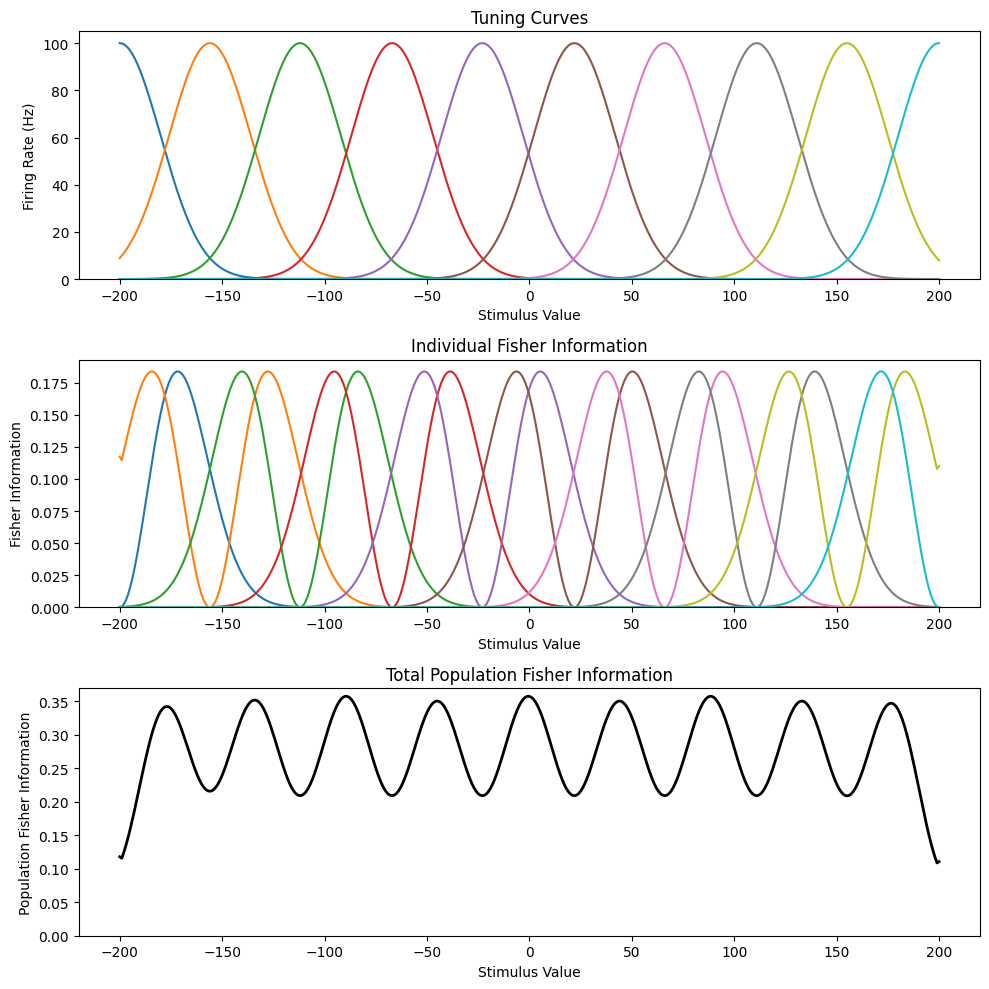

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neurostatsmodels.populations import GaussianTunedPopulation

# Create population
n_neurons = 10
pop = GaussianTunedPopulation(n_neurons=n_neurons, max_rate=100.0)

# Set up stimulus grid
stimulus_grid = np.linspace(-200, 200, 401)

# Configure population
pop.set_means_uniform(stimulus_grid)
pop.set_sigmas(20.0)

# Build curves on the grid
pop.build_tuning_curves(stimulus_grid)
pop.build_fisher_info_curves(epsilon=1e-10)

# Now query at specific points (works for single values!)
single_stimulus = 50.0
single_rates = pop.get_rates_at(single_stimulus)
single_fi = pop.get_population_fisher_info_at(single_stimulus)

print(f"At stimulus = {single_stimulus}:")
print(f"Rates: {single_rates}")
print(f"Population FI: {single_fi:.4f}")

# Plot using stored curves (access TsdFrame correctly)
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Tuning curves - access TsdFrame columns
for i in range(n_neurons):
    axes[0].plot(stimulus_grid, pop.tuning_curves.values[:, i])
axes[0].set_xlabel("Stimulus Value")
axes[0].set_ylabel("Firing Rate (Hz)")
axes[0].set_title("Tuning Curves")
axes[0].set_ylim(bottom=0)

# Individual FI - access TsdFrame columns
for i in range(n_neurons):
    axes[1].plot(stimulus_grid, pop.fisher_info_curves.values[:, i])
axes[1].set_xlabel("Stimulus Value")
axes[1].set_ylabel("Fisher Information")
axes[1].set_title("Individual Fisher Information")
axes[1].set_ylim(bottom=0)

# Population FI - sum across neurons (axis 1)
pop_fi_curve = np.sum(pop.fisher_info_curves.values, axis=1)
axes[2].plot(stimulus_grid, pop_fi_curve, "k", linewidth=2)
axes[2].set_xlabel("Stimulus Value")
axes[2].set_ylabel("Population Fisher Information")
axes[2].set_title("Total Population Fisher Information")
axes[2].set_ylim(bottom=0)

plt.tight_layout()
plt.show()

C:\Users\MainUser\Documents\GitHub\neurostatsmodels\neurostatsmodels\populations.py:298: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  trial_epochs = nap.IntervalSet(


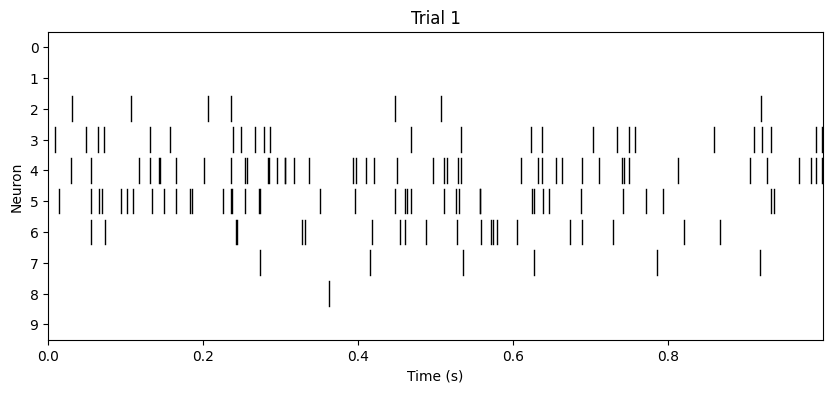

In [3]:
from neurostatsmodels.populations import GaussianTunedPopulation
from neurostatsmodels.plotting import plot_spike_raster

# Generate spikes (returns TsGroup)
pop = GaussianTunedPopulation(n_neurons=10, max_rate=50.0)
pop.set_means_uniform(np.linspace(-200, 200, 100))
pop.set_sigmas(50.0)
spikes = pop.generate_spikes(0.0, duration=1.0, n_trials=5)

# Plot trial 1 using new API
fig, ax = plot_spike_raster(spikes, trial_idx=1, title="Trial 1")

C:\Users\MainUser\Documents\GitHub\neurostatsmodels\neurostatsmodels\populations.py:298: UserWarning: Some starts and ends are equal. Removing 1 microsecond!
  trial_epochs = nap.IntervalSet(


Bias: 0.44, Std: 3.64


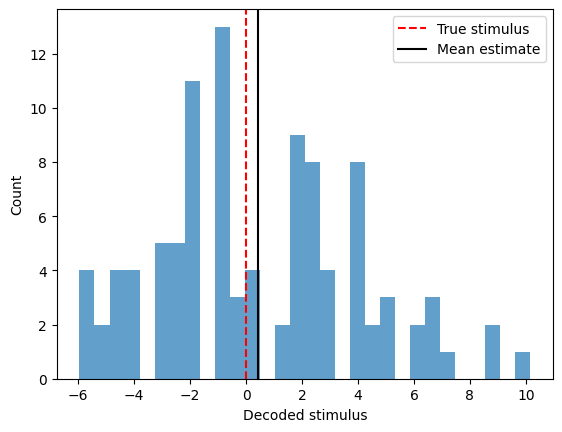

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from neurostatsmodels.populations import GaussianTunedPopulation

# Create population
pop = GaussianTunedPopulation(n_neurons=10, max_rate=50.0)
pop.set_means_uniform(np.linspace(-200, 200, 100))
pop.set_sigmas(50.0)

# Generate spikes at true stimulus = 0 (returns TsGroup)
true_stimulus = 0.0
spikes = pop.generate_spikes(true_stimulus, duration=1.0, n_trials=100)

# Decode each trial using new API (no duration parameter)
s_hat = pop.decode_mle(spikes)

# Analyze bias and spread
bias = np.mean(s_hat) - true_stimulus
std = np.std(s_hat)
print(f"Bias: {bias:.2f}, Std: {std:.2f}")

# Plot histogram
plt.hist(s_hat, bins=30, alpha=0.7)
plt.axvline(true_stimulus, color='r', linestyle='--', label='True stimulus')
plt.axvline(np.mean(s_hat), color='k', linestyle='-', label='Mean estimate')
plt.xlabel('Decoded stimulus')
plt.ylabel('Count')
plt.legend()
plt.show()